In [1]:
import thinkstats2
import pandas
import thinkplot
import numpy as np
import statsmodels.tsa.stattools as smtsa

%matplotlib inline

In [2]:
#dictionary of dataframes
dfs = {}

media_names = ["cnn","huff","la_times","npr","nbc","fox","fox_friends","cbs","bbc","abc","wsj","nyt","wash_post","time","usa_today"]

for name in media_names:
    dfs[name] = pandas.read_csv(name+"_mod.csv", encoding = "ISO-8859-1", quotechar='"',error_bad_lines=False, parse_dates = [19])

In [3]:
len(dfs["cnn"])

31696

In [4]:
dfs["huff"].tail(20)

,id,page_id,name,message,description,caption,post_type,status_type,likes_count,comments_count,shares_count,love_count,wow_count,haha_count,sad_count,thankful_count,angry_count,link,picture,posted_at
85369,"ï»¿""18468761129_10154392091781130""",18468761129,Timeline Photos,See you on the other side.,NaN,NaN,photo,added_photos,16797,504,868,2646,25,267,21,0,52,https://www.facebook.com/HuffingtonPost/photos...,https://scontent.xx.fbcdn.net/v/t1.0-0/p130x13...,2016-11-07 17:19:45
85370,"ï»¿""18468761129_10154392118616130""",18468761129,HuffPost Black Voices,NaN,Join HuffPost Black Voicesâ Jacques Morel Jr...,NaN,video,shared_story,100,19,0,2,1,0,5,0,0,https://www.facebook.com/blackvoicesdotcom/vid...,https://scontent.xx.fbcdn.net/v/t15.0-10/s130x...,2016-11-07 17:36:14
85371,"ï»¿""18468761129_10154392127876130""",18468761129,Why You Should Vote For Hillary If You're Agai...,'If your candidate focuses on maintaining and ...,I am a doctor who has dedicated her career to ...,huffingtonpost.com,link,shared_story,15197,490,3338,1176,17,82,8,0,39,http://huff.to/2fUmdQH,https://external.xx.fbcdn.net/safe_image.php?d...,2016-11-07 17:41:28
85372,"ï»¿""18468761129_10154392138876130""",18468761129,HuffPost Politics,NaN,Independent candidate Evan McMullin joins us i...,NaN,video,shared_story,147,72,0,6,11,4,2,0,20,https://www.facebook.com/HuffPostPolitics/vide...,https://scontent.xx.fbcdn.net/v/t15.0-10/s130x...,2016-11-07 17:46:40
85373,"ï»¿""18468761129_10154392168696130""",18468761129,"Thanks To Trump, I Blocked My Uncle On Faceboo...",'No longer do people just watch the evening ne...,My family seems to think God is a Republican.,huffingtonpost.com,link,shared_story,15417,1238,7656,308,258,2104,1740,0,107,http://huff.to/2fUiz9p,https://external.xx.fbcdn.net/safe_image.php?d...,2016-11-07 18:00:16
85374,"ï»¿""18468761129_10154392360686130""",18468761129,Ted Nugent Grabbing His Crotch During Trump Ra...,Donald J. Trump might be offended by JAY Z's l...,He made the gesture while on stage in Michigan.,huffingtonpost.com,link,shared_story,1970,2200,1127,87,353,1085,86,0,900,http://huff.to/2faeexz,https://external.xx.fbcdn.net/safe_image.php?d...,2016-11-07 19:00:15
85375,"ï»¿""18468761129_10154392533741130""",18468761129,"The Moment I Realized That Trump Triggers Men,...",'Iâm one of the countless women for whom Tru...,Of all the things Donald Trump has been called...,huffingtonpost.com,link,shared_story,826,136,157,18,22,18,193,0,109,http://huff.to/2ewI9fa,https://external.xx.fbcdn.net/safe_image.php?d...,2016-11-07 20:00:31
85376,"ï»¿""18468761129_10154392606781130""",18468761129,Baby Held By Larger Baby Is Ready For This Ele...,We are all this baby.,"Yeah, that about sums it up.",huffingtonpost.com,link,shared_story,4589,434,346,126,24,2983,12,0,26,http://huff.to/2ex3JR4,https://external.xx.fbcdn.net/safe_image.php?d...,2016-11-07 20:30:21
85377,"ï»¿""18468761129_10154392670856130""",18468761129,Glenn Beck Says He Supports Black Lives Matter...,Yes. Glenn Beck.,Hmm.,huffingtonpost.com,link,shared_story,19869,1578,4993,1004,4300,433,11,0,67,http://huff.to/2fhP51D,https://external.xx.fbcdn.net/safe_image.php?d...,2016-11-07 21:00:24
85378,"ï»¿""18468761129_10154392682811130""",18468761129,HuffPost Politics,NaN,"Election Day is just around the corner, so we'...",NaN,video,shared_story,56,41,0,6,1,0,0,0,2,https://www.facebook.com/HuffPostPolitics/vide...,https://scontent.xx.fbcdn.net/v/t15.0-10/s130x...,2016-11-07 21:05:35


In [7]:
#Dataframe of likes and timestamp from the huffington post
huff_df = dfs['huff'][['likes_count', 'posted_at']]
#Add year column which is timestamp represented as a number of years
#since the first post
start = huff_df.posted_at[0]
one_year = np.timedelta64(1, 'Y')
huff_df['years'] = (huff_df.posted_at - start) / one_year

/home/sung/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
huff_df

,likes_count,posted_at,years
0,2,2012-01-23 08:00:00,0.000000
1,3,2012-02-08 08:00:00,0.043807
2,88,2012-02-28 19:58:43,0.099931
3,183,2012-02-28 20:20:09,0.099972
4,241,2012-02-28 20:40:37,0.100011
5,67,2012-02-28 21:01:09,0.100050
6,263,2012-02-28 21:25:22,0.100096
7,591,2012-02-28 21:50:14,0.100143
8,129,2012-02-28 22:35:32,0.100229
9,487,2012-02-28 23:26:26,0.100326


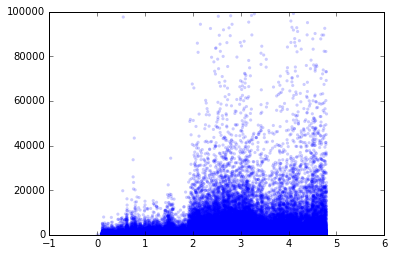

In [9]:
thinkplot.Config(ylim=[0,100000])
thinkplot.Scatter(huff_df.years, huff_df.likes_count, s=10)

In [10]:
#Dataframe of likes and timestamp from the abc
abc_df = dfs['abc'][['likes_count', 'posted_at']]
#Add year column which is timestamp represented as a number of years
#since the first post
start = abc_df.posted_at[0]
one_year = np.timedelta64(1, 'Y')
abc_df['years'] = (abc_df.posted_at - start) / one_year

/home/sung/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


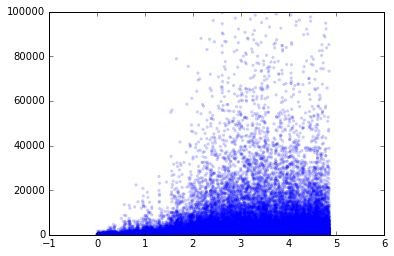

In [11]:
thinkplot.Config(ylim=[0,100000])
thinkplot.Scatter(abc_df.years, abc_df.likes_count, s=10)

In [12]:
#Rolling averages
#huff_df_roll_mean = pandas.rolling_mean(huff_df.likes_count, 30)
huff_df_roll_mean = huff_df.likes_count.rolling(center=False, window=30).mean()

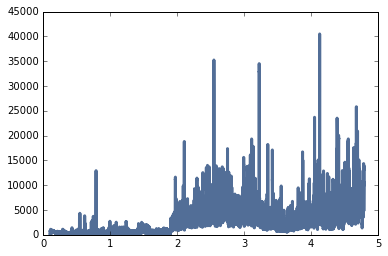

In [13]:
thinkplot.Plot(huff_df.years,huff_df_roll_mean)

In [14]:
#EWMA (exponentially-weighted moving average)
#huff_ewma = pandas.ewma(huff_df.likes_count, span=30)
huff_ewma = huff_df.likes_count.ewm(ignore_na=False,min_periods=0,span=30,adjust=True).mean()

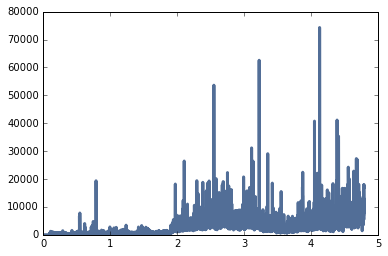

In [15]:
thinkplot.Plot(huff_df.years,huff_ewma)

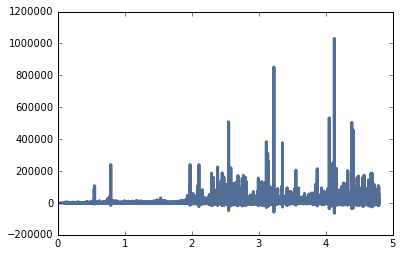

In [16]:
#Subtracting away trend
huff_resid = huff_df.likes_count - huff_ewma
thinkplot.Plot(huff_df.years, huff_resid)

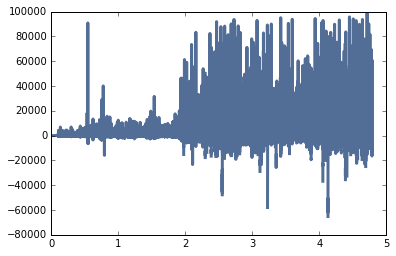

In [17]:
huff_resid[huff_resid>100000] = np.NaN
thinkplot.Plot(huff_df.years, huff_resid)

In [18]:
#autocorrelation function
huff_acf = smtsa.acf(huff_resid, nlags=365, unbiased=True)

In [19]:
huff_acf[0], huff_acf[1], huff_acf[7], huff_acf[30], huff_acf[365]

(nan, nan, nan, nan, nan)

In [25]:
#Run autocorrelate function analysis on multiple media outlets

acf_values = []

for name in media_names:
    df = dfs[name][['likes_count', 'posted_at']]
    
    start = df.posted_at[0]
    one_year = np.timedelta64(1, 'Y')
    df['years'] = (df.posted_at - start) / one_year
    
    df_ewma = df.likes_count.ewm(ignore_na=False,min_periods=0,span=30,adjust=True).mean()
    
    df_resid = df.likes_count - df_ewma
    #df_resid[df_resid>100000] = np.NaN
    
    acf_values.extend([abs(df_acf[1]), abs(df_acf[7]), abs(df_acf[30]), abs(df_acf[365])])
    
    df_acf = smtsa.acf(df_resid, nlags=365, unbiased=True)
    print("{:10}: 1 days:{}   7 days:{}   30 days:{}   365 days:{}".format(name, df_acf[1], df_acf[7], df_acf[30], df_acf[365]))
    
acf_values.sort()
print("5 biggest acf values: ", acf_values[-5:])

/home/sung/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


cnn       : 1 days:-0.029756534977066724   7 days:-0.0004785693401439372   30 days:-0.0006886404933035297   365 days:-0.002546237951539804
huff      : 1 days:-0.014442282792503917   7 days:-0.026183919462200732   30 days:-0.007970192420518305   365 days:-0.00019594467253888708
la_times  : 1 days:-0.031138879018477013   7 days:-0.008998078485048548   30 days:-0.0042169043615362225   365 days:-0.003682419291510698
npr       : 1 days:-0.027428518881018975   7 days:-0.025808008785235252   30 days:-0.006584060781139451   365 days:-0.006376719346369967
nbc       : 1 days:-0.019437874239638102   7 days:-0.028276027511564595   30 days:-0.006532568617991822   365 days:0.005096078582649778
fox       : 1 days:-0.004308856610576095   7 days:-0.008457467641435866   30 days:-0.0007433323062722195   365 days:-0.012392345085506525
fox_friends: 1 days:-0.004017589133827942   7 days:-0.0315307119193414   30 days:-0.002057091266958815   365 days:0.0059177877708477
cbs       : 1 days:-0.03166688187731559 